Overview: Simulate
------------------

**PyAutoLens** provides tool for simulating strong lens data-sets, which can be used to test lens modeling pipelines
and train neural networks to recognise and analyse images of strong lenses.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt
from astropy import cosmology as cosmo

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


In this overview `autolens_workspace/scripts/overview/lensing.py` we used a  tracer and grid to create an image of
 a strong lens.

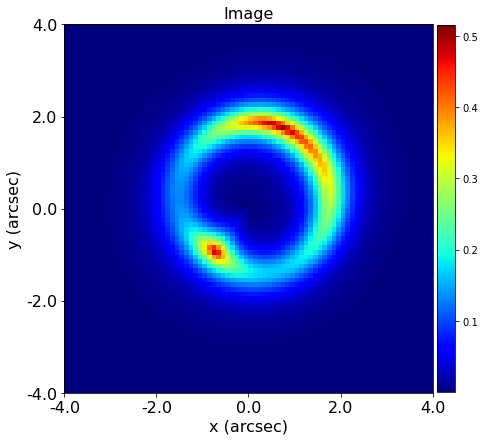

In [2]:
grid = al.Grid2D.uniform(
    shape_native=(80, 80),
    pixel_scales=0.1,  # <- The pixel-scale describes the conversion from pixel units to arc-seconds.
)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0), elliptical_comps=(0.1, 0.0), einstein_radius=1.6
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllExponential(
        centre=(0.3, 0.2),
        elliptical_comps=(0.1, 0.0),
        intensity=0.1,
        effective_radius=0.5,
    ),
)

tracer = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy, source_galaxy], cosmology=cosmo.Planck15
)

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

Simulating strong lens images uses a `SimulatorImaging` object, which models the process that an instrument like the
Hubble Space Telescope goes through observe a strong lens. This includes accounting for the exposure time to 
determine the signal-to-noise of the data, blurring the observed light of the strong lens with the telescope optics 
and accounting for the background sky in the exposure which adds Poisson noise.

In [3]:
psf = al.Kernel2D.from_gaussian(shape_native=(11, 11), sigma=0.1, pixel_scales=0.05)

simulator = al.SimulatorImaging(
    exposure_time=300.0, background_sky_level=1.0, psf=psf, add_poisson_noise=True
)

Once we have a simulator, we can use it to create an imaging dataset which consists of an image, noise-map and 
Point Spread Function (PSF) by passing it a tracer and grid.

This uses the tracer above to create the image of the strong lens and then add the effects that occur during data
acquisition.

In [4]:
imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:

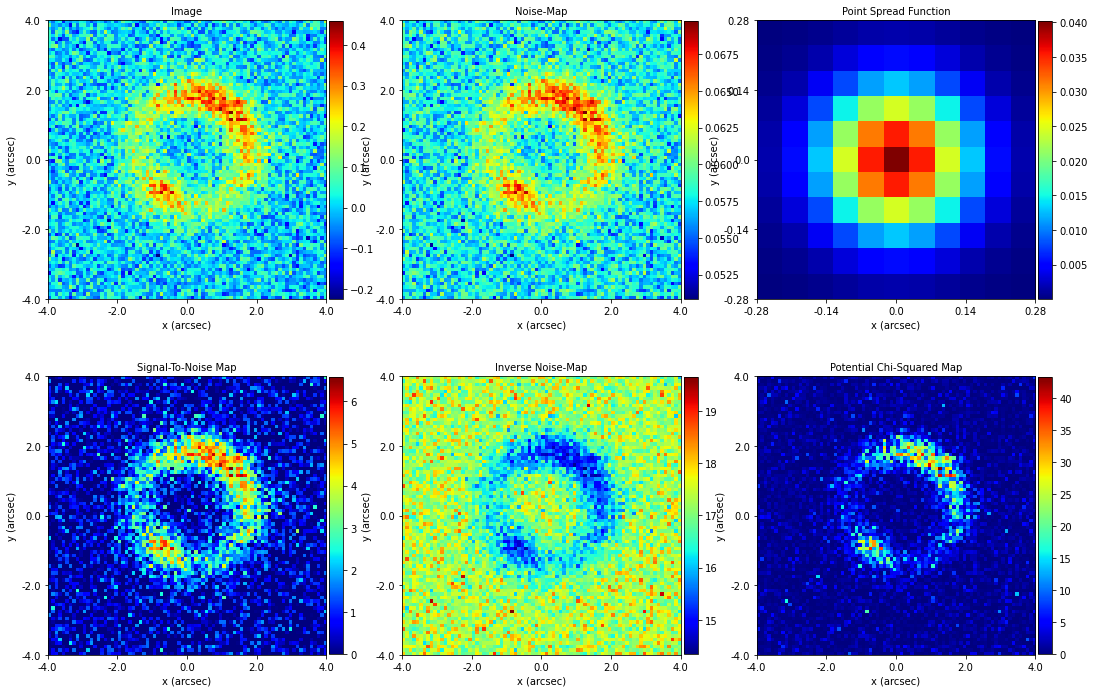

In [5]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.subplot_imaging()

The `autolens_workspace` includes many example simulators for simulating strong lenses with a range of different 
physical properties, to make imaging datasets for a variety of telescopes (e.g. Hubble, Euclid) as well as 
interferometer datasets.